                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     645.5
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           1.76e-06
Time:                        15:39:59   Log-Likelihood:                -63.886
No. Observations:                   7   AIC:                             131.8
Df Residuals:                       5   BIC:                             131.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.049e+04   5513.326     -5.531      0.0

c:\Users\avasi\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


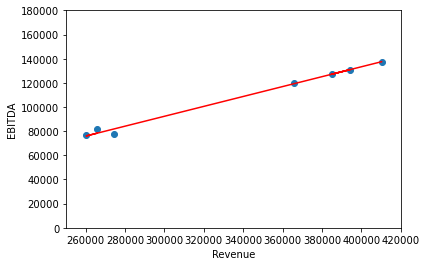

Regression T-value: 25.407587467051776 vs Critical_value: 2.5705818366147395

Predicted Revenue for 2023: 384940.0
Predicted EBITDA for 2023:127106.77
Predicted Revenue for 2023: 410330.0
Predicted EBITDA for 2024:137501.81

        Revenue     EBITDA  Ebitda_Margin  EBITDA_%_Growth
Years                                                     
2018   265595.0   81801.00           0.31              NaN
2019   260174.0   76477.00           0.29             -7.0
2020   274515.0   77344.00           0.28              1.0
2021   365817.0  120233.00           0.33             55.0
2022   394328.0  130541.00           0.33              9.0
2023   384940.0  127106.77           0.33             -3.0
2024   410330.0  137501.81           0.34              8.0


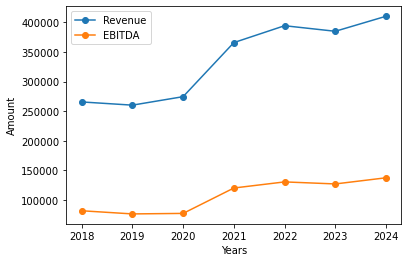

In [14]:
## Working
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


Years = [2018,     2019,     2020,    2021,     2022,    2023,     2024]
Revenue = [265595.0, 260174.0, 274515.0, 365817.0, 394328.0,384940.0, 410330.0]
EBITDA = [81801.0, 76477.0, 77344.0, 120233.0, 130541.0, 127106.77, 137501.81]
ebitda_last_y_margin = EBITDA[-1] / Revenue[-1]
rev_std = np.std(Revenue)
ebitda_sdev = np.std(EBITDA)
iterations = 1000


X = Revenue
Y = EBITDA
significance_level = 0.05
critical_value = stats.t.ppf(1 - significance_level / 2, len(X) - 2)

# Regression summary & visualization 
Rev = sm.add_constant(X)
reg = sm.OLS(Y, Rev).fit()
print(reg.summary())
plt.scatter(Revenue, EBITDA, label = "Regression_line")
plt.plot(Revenue, reg.params[0] + reg.params[1] * np.array(Revenue), color='red', label='Regression Line')
plt.axis([min(Revenue) - 10000, max(Revenue) + 10000, 0, 180000])
plt.xlabel("Revenue")
plt.ylabel("EBITDA")
plt.show()

# EBITDA margin and s.dev calculation
def ebitda_sdev_margin(EBITDA , Revenue , Years):
    margin = []
    for i in range(len(Years)):
        calculation = round(EBITDA[i]/Revenue[i],2)
        margin.append(calculation)
    return margin

margin = ebitda_sdev_margin(EBITDA, Revenue, Years)
ebitda_sdev = np.std(margin)


def ebitda_growth(EBITDA):
    y_y_growth = []
    for i in range(len(EBITDA) - 1):
        calculation = round((EBITDA[i+1] / EBITDA[i]) - 1, 2) * 100 
        y_y_growth.append(calculation)
    return y_y_growth
growth = ebitda_growth(EBITDA)


# Accessing t-values
t_value = reg.tvalues[1]
print(f"Regression T-value:", t_value, f"vs Critical_value:", critical_value)
print()
print(f"Predicted Revenue for 2023: {Revenue[-2]}")
print(f"Predicted EBITDA for 2023:{EBITDA[-2]}")
print(f"Predicted Revenue for 2023: {Revenue[-1]}")
print(f"Predicted EBITDA for 2024:{EBITDA[-1]}")
print()


# Predicting the EBITDA based on the regression or Monte Carlo simmulation 
def prediction(reg):
    predicted_revenue = [410330.0]
    predicted_value = []

    if abs(t_value) > stats.t.ppf(1 - significance_level / 2, len(X) - 2):
        for revenue in predicted_revenue:
            calculation = round(reg.params[0] + (revenue * reg.params[1]), 2)
            predicted_value.append(calculation)
    else:
        print(f"The t-stat is too low, have to use the random normal distribution for prediction")
        rev = np.random.normal(predicted_revenue, rev_std, iterations)
        calculation_1 = np.round(rev * np.random.normal(ebitda_last_y_margin, ebitda_sdev), 2)
        value = calculation_1.mean()
        predicted_value.append(value)
    return predicted_value


# Creating a pandas table 
table = pd.DataFrame({"Years": Years, "Revenue": Revenue, "EBITDA":EBITDA, "Ebitda_Margin": margin,"EBITDA_%_Growth": [None] + growth})
table.set_index("Years", inplace = True)
print(table)


# EBITDA and Revenue visualization 
plt.plot(table["Revenue"], label="Revenue", marker = 'o')
plt.plot(table["EBITDA"], label="EBITDA", marker = 'o')
plt.xlabel("Years")
plt.ylabel("Amount")
plt.legend()
plt.show()